In [2]:
import numpy as np

# 定义函数生成二分类数据集
def generate_classification_dataset(size, feature_dim, mean_diff):
    # 生成均值为 mean_diff 和 -mean_diff，方差为 1 的正态分布数据
    X1 = np.random.normal(loc=mean_diff, scale=1, size=(size//2, feature_dim))
    X2 = np.random.normal(loc=-mean_diff, scale=1, size=(size//2, feature_dim))
    
    # 将两个数据集合并，并为它们的标签分别赋值为 0 和 1
    X = np.vstack((X1, X2))
    y = np.hstack((np.zeros(size//2), np.ones(size//2)))
    
    # 打乱数据集的顺序，确保数据的随机性
    idx = np.random.permutation(size)
    X = X[idx]
    y = y[idx]
    
    return X, y

# 定义数据集大小和特征维度
data_size = 10000
train_size = 7000
test_size = 3000
feature_dim = 200
mean_difference = 2.0  # 均值差异，设置为 2.0

# 生成两个数据集
X_train1, y_train1 = generate_classification_dataset(train_size, feature_dim, mean_difference)
X_test1, y_test1 = generate_classification_dataset(test_size, feature_dim, mean_difference)
# 将数据集打印输出
print("Dataset 1 - Train Features shape:", X_train1.shape)
print("Dataset 1 - Train Labels shape:", y_train1.shape)
print("Dataset 1 - Test Features shape:", X_test1.shape)
print("Dataset 1 - Test Labels shape:", y_test1.shape)


Dataset 1 - Train Features shape: (7000, 200)
Dataset 1 - Train Labels shape: (7000,)
Dataset 1 - Test Features shape: (3000, 200)
Dataset 1 - Test Labels shape: (3000,)


Epoch [1/20], Loss: 0.9418
Test Loss: 0.8277, Test Accuracy: 0.1537
Epoch [2/20], Loss: 0.8261
Test Loss: 0.7332, Test Accuracy: 0.3740
Epoch [3/20], Loss: 0.7314
Test Loss: 0.6556, Test Accuracy: 0.6177
Epoch [4/20], Loss: 0.6538
Test Loss: 0.5903, Test Accuracy: 0.8030
Epoch [5/20], Loss: 0.5887
Test Loss: 0.5347, Test Accuracy: 0.9153
Epoch [6/20], Loss: 0.5335
Test Loss: 0.4870, Test Accuracy: 0.9720
Epoch [7/20], Loss: 0.4860
Test Loss: 0.4455, Test Accuracy: 0.9937
Epoch [8/20], Loss: 0.4450
Test Loss: 0.4095, Test Accuracy: 0.9990
Epoch [9/20], Loss: 0.4093
Test Loss: 0.3778, Test Accuracy: 0.9993
Epoch [10/20], Loss: 0.3780
Test Loss: 0.3499, Test Accuracy: 1.0000
Epoch [11/20], Loss: 0.3503
Test Loss: 0.3253, Test Accuracy: 1.0000
Epoch [12/20], Loss: 0.3259
Test Loss: 0.3034, Test Accuracy: 1.0000
Epoch [13/20], Loss: 0.3039
Test Loss: 0.2837, Test Accuracy: 1.0000
Epoch [14/20], Loss: 0.2843
Test Loss: 0.2659, Test Accuracy: 1.0000
Epoch [15/20], Loss: 0.2664
Test Loss: 0.24

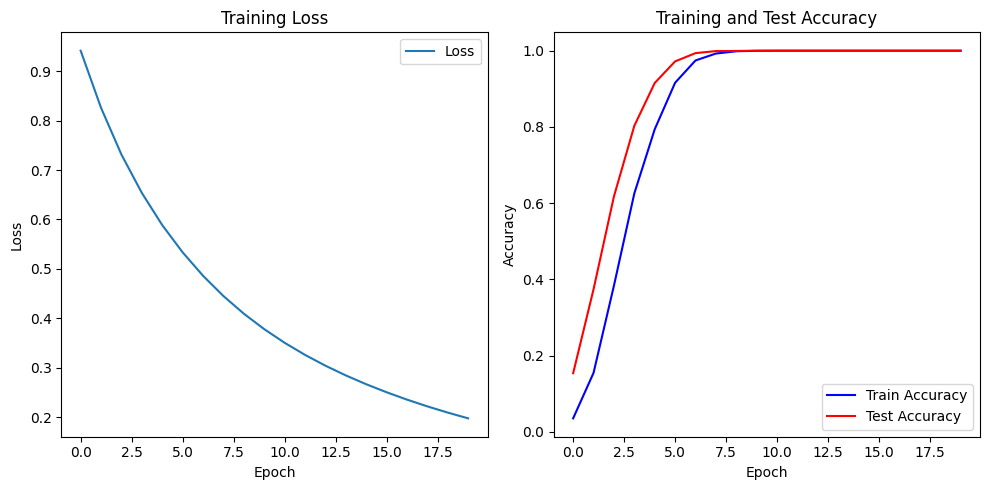

In [7]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# 定义前馈神经网络模型
class FeedforwardNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FeedforwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

    
#计算测试集准确率
def accuracy(predictions, labels):
    rounded_predictions = torch.round(torch.sigmoid(predictions))
#     print(rounded_predictions.view(-1).shape)
#     print("label+",labels.shape)
#     print((rounded_predictions.view(-1) == labels).shape)
    correct = (rounded_predictions.view(-1) == labels).sum().item()
    total = labels.size(0)
    return correct / total

# 定义模型超参数
input_size = feature_dim
hidden_size = 10
output_size = 1
learning_rate = 0.005
num_epochs = 20

# 初始化模型
model = FeedforwardNN(input_size, hidden_size, output_size)

# 定义损失函数和优化器
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# 转换数据为PyTorch的张量
X_train = torch.tensor(X_train1, dtype=torch.float)
y_train = torch.tensor(y_train1, dtype=torch.float)
X_test = torch.tensor(X_test1, dtype=torch.float)
y_test = torch.tensor(y_test1, dtype=torch.float)
losses = []
train_accuracy = []  # 记录训练集准确率
test_accuracy = []   # 记录测试集准确率

# 训练模型
for epoch in range(num_epochs):
    # 前向传播
    outputs = model(X_train)
    loss = criterion(outputs, y_train.unsqueeze(1))
    
    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 计算训练集准确率
    train_acc = accuracy(outputs, y_train)
    train_accuracy.append(train_acc)
#     if (epoch+1) % 10 == 0:
#         print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    losses.append(loss.item())
    # 使用测试集评估模型并计算测试集准确率
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test.unsqueeze(1))
        test_acc = accuracy(test_outputs, y_test)
        test_accuracy.append(test_acc)    
    print(f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {test_acc:.4f}')



# 绘制损失和准确率图表
plt.figure(figsize=(10, 5))

# 绘制损失图表
plt.subplot(1, 2, 1)
plt.plot(losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# 绘制准确率图表
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy', color='blue')
plt.plot(test_accuracy, label='Test Accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
import torch
import numpy as np
import random
from IPython import display
import torch.utils.data as Data
import matplotlib.pyplot as plt

In [13]:
input_num = 200
x1 = torch.normal(2,1,(10000,input_num))
y1 = torch.ones(10000,1)#标签1
x1_train = x1[:7000]
x1_test = x1[7000:]
x2 = torch.normal(-2,1,(10000,input_num))
y2 = torch.zeros(10000,1)#标签1
x2_train = x1[:7000]
x2_test = x1[7000:]
trainfeatures=torch.cat((x1_train,x2_train),0).type(torch.FloatTensor)
trainlabels = torch.cat((y1[:7000],y2[:7000]),0).type(torch.FloatTensor)
testfeatures=torch.cat((x1_test,x2_test),0).type(torch.FloatTensor)
testlabels=torch.cat((y1[7000:],y2[7000:]),0).type(torch.FloatTensor)


In [14]:
#设置批量大小
batch_size = 50
dataset1 = Data.TensorDataset(trainfeatures,trainlabels)
train_iter = Data.DataLoader(
    dataset=dataset1,
    batch_size = batch_size,
    shuffle =True,
    num_workers=0,
)
dataset2 = Data.TensorDataset(testfeatures,testlabels)
test_iter = Data.DataLoader(
    dataset = dataset2,
    batch_size = batch_size,
    shuffle = False,
    num_workers=0,
)


In [15]:
#定义超参数
# input_num=200
hidden_num = 100
output_num = 1
W1 = torch.tensor(np.random.normal(0, 1, (input_num,hidden_num)), dtype=torch.float32)  
b1 = torch.zeros(1, dtype=torch.float32)
W2 = torch.tensor(np.random.normal(0, 1, (hidden_num,output_num)), dtype=torch.float32)  
b2 = torch.zeros(1, dtype=torch.float32)  
params = [W1,b1,W2,b2]
for param in params:
    param.requires_grad_(requires_grad = True)


In [16]:
def ReLU(x):
    x=torch.max(x,torch.tensor(0.0))
    return x
def SGD(params,lr,batch_size):
    for param in params:
        param.data -= lr * param.grad/batch_size
def net(X):
    X=X.view((-1,input_num))
    H=ReLU(torch.mm(X,W1)+b1)
    return torch.mm(H,W2)+b2 


In [17]:
def train(net,train_iter,test_iter,loss,num_epochs,batch_size,params = None,lr=None,optimizer=None):
    train_loss=[]
    test_loss=[]
    for epoch in range(num_epochs):
        train_l_sum=0.0
        test_l_sum=0.0
        n =0.0
        
        for X,y in train_iter:
            y_hat = net(X)
            
            l = loss(y_hat,y.view(-1,1))
            if optimizer is not None:
                optimizer.zero_grad()
            elif params is not None and params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()
            l.backward()
            if optimizer is None:
                SGD(params,lr,batch_size)
            else:
                optimizer.step()
        test_l_sum = loss(net(testfeatures),testlabels).item()
        train_l_sum = loss(net(trainfeatures),trainlabels).item()
        train_loss.append(train_l_sum)
        test_loss.append(test_l_sum)
        print("epoch %d,train_loss %.6f,test_loss %.6f"%(epoch+1,train_loss[epoch],test_loss[epoch])) 
    return train_loss, test_loss


In [18]:
# 定义二分类交叉熵损失函数
loss = torch.nn.BCEWithLogitsLoss()
lr = 0.01
num_epochs = 100
train_loss,test_loss = train(net,train_iter,test_iter,loss,num_epochs,batch_size,params,lr)


epoch 1,train_loss 32.732834,test_loss 33.313484
epoch 2,train_loss 30.405777,test_loss 31.012394
epoch 3,train_loss 28.190262,test_loss 28.819601
epoch 4,train_loss 26.080332,test_loss 26.728468
epoch 5,train_loss 24.089729,test_loss 24.756378
epoch 6,train_loss 22.218576,test_loss 22.861790
epoch 7,train_loss 20.482826,test_loss 21.040340
epoch 8,train_loss 18.851143,test_loss 19.339666
epoch 9,train_loss 17.338140,test_loss 17.753908
epoch 10,train_loss 15.997406,test_loss 16.348770
epoch 11,train_loss 14.714878,test_loss 15.036592
epoch 12,train_loss 13.569749,test_loss 13.869821
epoch 13,train_loss 12.564383,test_loss 12.809013
epoch 14,train_loss 11.582334,test_loss 11.835471
epoch 15,train_loss 10.735194,test_loss 10.899030
epoch 16,train_loss 9.885321,test_loss 10.026134
epoch 17,train_loss 9.121430,test_loss 9.293169
epoch 18,train_loss 8.416033,test_loss 8.534997
epoch 19,train_loss 7.760891,test_loss 7.886223
epoch 20,train_loss 7.169795,test_loss 7.297570
epoch 21,train_los

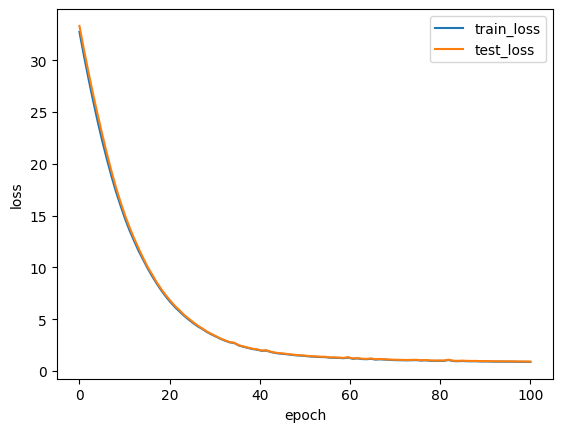

In [20]:
import matplotlib.pyplot as plt
x=np.linspace(0,len(train_loss),len(train_loss))
plt.plot(x,train_loss,label="train_loss",linewidth=1.5)
plt.plot(x,test_loss,label="test_loss",linewidth=1.5)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()